In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

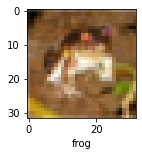

In [10]:
plot_sample(X_train, y_train, 0)

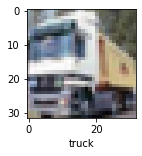

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 117s 74ms/step - loss: 1.8182 - accuracy: 0.3515
Epoch 2/5
1563/1563 [==============================] - 121s 78ms/step - loss: 1.6233 - accuracy: 0.4277
Epoch 3/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.5417 - accuracy: 0.4579
Epoch 4/5
1563/1563 [==============================] - 120s 77ms/step - loss: 1.4821 - accuracy: 0.4783
Epoch 5/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.4324 - accuracy: 0.4935


In [32]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.40      0.49      1000
           1       0.65      0.55      0.60      1000
           2       0.35      0.35      0.35      1000
           3       0.29      0.55      0.38      1000
           4       0.36      0.49      0.42      1000
           5       0.46      0.26      0.33      1000
           6       0.66      0.32      0.43      1000
           7       0.40      0.69      0.51      1000
           8       0.77      0.42      0.54      1000
           9       0.56      0.56      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.46     10000
weighted avg       0.51      0.46      0.46     10000



In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4835 - accuracy: 0.4679
Epoch 2/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.1363 - accuracy: 0.6027
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0134 - accuracy: 0.6479
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9318 - accuracy: 0.6765
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8629 - accuracy: 0.7030
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8032 - accuracy: 0.7204
Epoch 7/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7556 - accuracy: 0.7377
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7116 - accuracy: 0.7520
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6752 - accuracy: 0.7627
Epoch 10/10
1563/1563 [==============================] - 63s 40m

In [27]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9281 - accuracy: 0.6894


[0.9280999302864075, 0.6894000172615051]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.9806896e-03, 5.1431944e-05, 5.5023665e-03, 8.7727141e-01,
        9.9039299e-04, 8.0649853e-02, 4.9393810e-04, 6.3056708e-04,
        3.2384448e-02, 4.4835742e-05],
       [1.5373497e-02, 7.1880594e-03, 8.4508203e-05, 4.8270726e-05,
        1.9053772e-06, 8.0584391e-07, 4.9246069e-07, 1.6474402e-06,
        9.7707182e-01, 2.2895119e-04],
       [4.8243325e-02, 1.8698402e-01, 1.8152984e-02, 2.0593714e-02,
        3.8382665e-03, 2.5821130e-03, 5.4121704e-04, 3.6778066e-02,
        6.4688003e-01, 3.5406359e-02],
       [6.1927038e-01, 2.2761161e-03, 1.7349301e-01, 3.1669635e-02,
        3.9869687e-04, 8.7440618e-05, 6.6558918e-04, 3.0805248e-05,
        1.7186566e-01, 2.4270768e-04],
       [8.4824278e-06, 1.5168858e-04, 7.5707245e-03, 2.3628707e-01,
        1.9553362e-01, 1.2921861e-02, 5.4739916e-01, 2.4130622e-06,
        1.2490290e-04, 1.1903146e-07]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

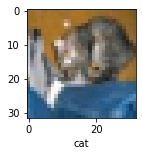

In [29]:
plot_sample(X_test, y_test,0)

In [34]:
classes[y_classes[3]]

'airplane'

In [35]:
classes[y_classes[3]]

'airplane'

In [37]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      1000
           1       0.80      0.83      0.82      1000
           2       0.62      0.57      0.59      1000
           3       0.43      0.62      0.51      1000
           4       0.67      0.61      0.64      1000
           5       0.57      0.64      0.60      1000
           6       0.83      0.64      0.72      1000
           7       0.78      0.72      0.75      1000
           8       0.79      0.81      0.80      1000
           9       0.82      0.72      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.69     10000
weighted avg       0.71      0.69      0.69     10000

